In [418]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [419]:
df= pd.read_csv('Titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [420]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [421]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [422]:
# Note the train test split must be done before the Imputaion so that there are no data leaks
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state= 2 )

In [423]:
# Now as we will impute this with pandas using the mean(),median() method one by one for both the Age and Fare columns.
age_mean = X_train['Age'].mean()
age_median = X_train['Age'].median()

fare_mean = X_train['Fare'].mean()
fare_median = X_train['Fare'].median()

In [424]:
# Now we will create new columns for each to verify the results before and after the Imputation method 
# First we will do the pandas method , at the end we will do the Column Transformer method using Simple Imputer

X_train['Age_mean'] = X_train['Age'].fillna(age_mean)
X_train['Age_median'] = X_train['Age'].fillna(age_median)

X_train['Fare_mean'] = X_train['Fare'].fillna(fare_mean)
X_train['Fare_median'] = X_train['Fare'].fillna(fare_median)

In [425]:
X_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [426]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [427]:
X_train.var()

Age             204.349513
Fare           2448.197914
Family            2.735252
Age_mean        161.812625
Age_median      161.989566
Fare_mean      2324.238526
Fare_median    2340.091022
dtype: float64

[]

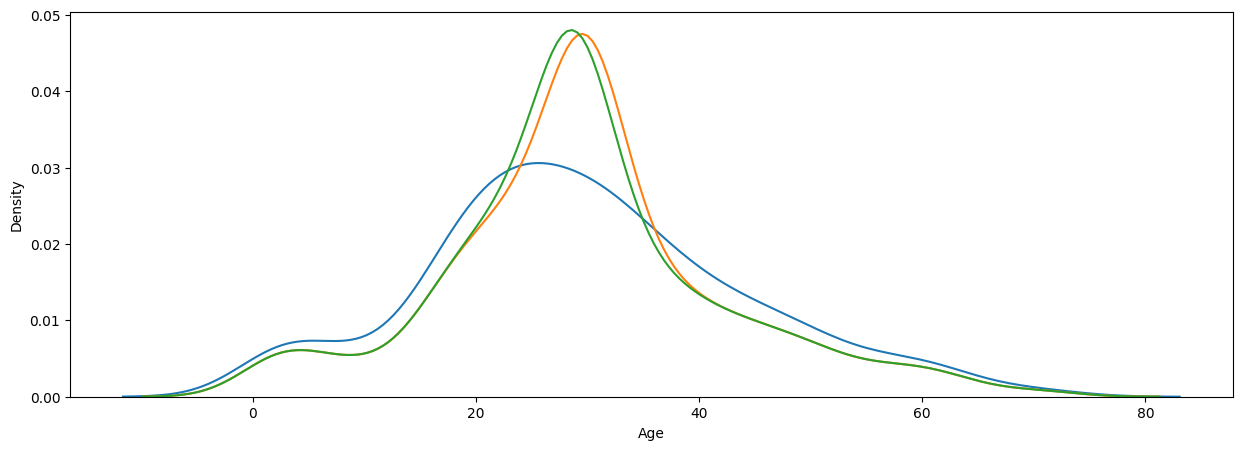

In [428]:
# We check the distribution , the variance and the density , and choose which Impute is the best for our dataset.
# There is a lot of difference in mean and median in the density plot , so here we have to Analyze and choose suc
plt.figure(figsize=(15,5))
sns.kdeplot(data=X_train['Age'])
sns.kdeplot(data=X_train['Age_mean'])
sns.kdeplot(data=X_train['Age_median'])
plt.plot()

[]

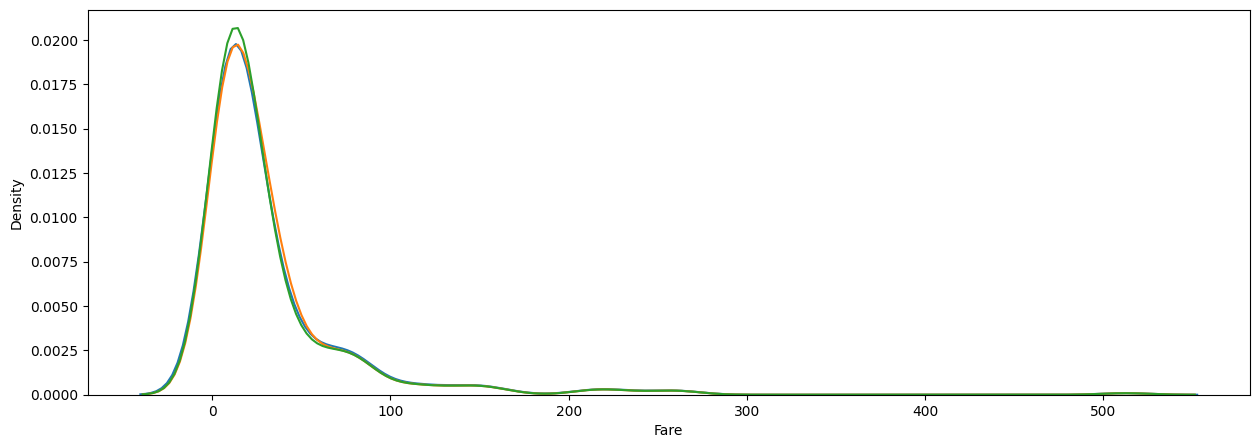

In [429]:
# As we can say here the Fare mean and median can both be used for Imputation as it barely effects the Distribution .
plt.figure(figsize=(15,5))
sns.kdeplot(data=X_train['Fare'])
sns.kdeplot(data=X_train['Fare_mean'])
sns.kdeplot(data=X_train['Fare_median'])
plt.plot()

<Axes: >

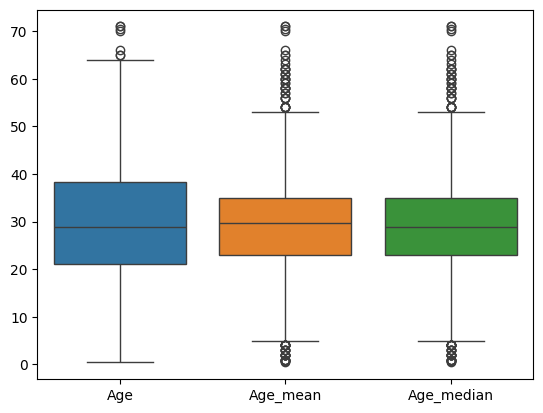

In [430]:
# We select the values which is the closest to the original distribution and whose covariance is closer to the original covariance.
# Now lets look at the outliers here for both the columns using boxplot

sns.boxplot(data=X_train[['Age','Age_mean','Age_median']])

<Axes: >

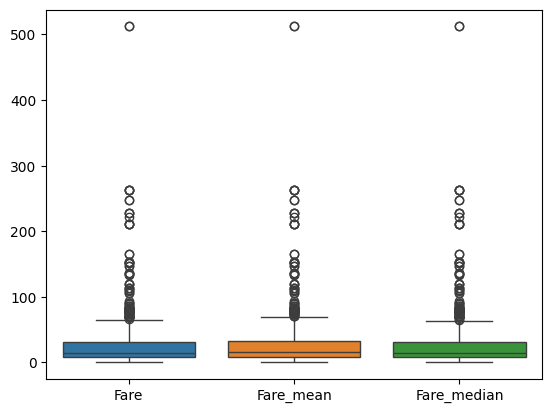

In [431]:
sns.boxplot(data=X_train[['Fare','Fare_mean','Fare_median']])

In [432]:
# Now using Simple imputer in Column transformer
# We can do the traditional fitting of the Simple Imputer and then tranform the columns , but as we know the Column Transformer , it will reduce the work load

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

trf1 = ColumnTransformer(
        transformers= [
            ( 'imputer_mean' , SimpleImputer(strategy='mean') , ['Age','Fare'] ) ,
            ( 'imputer_median' , SimpleImputer(strategy='median') , ['Age','Fare'] )
        ] ,
        remainder='passthrough'
)

In [433]:
trf1.fit(X_train)

,transformers,"[('imputer_mean', ...), ('imputer_median', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [434]:
# Accessing the transformer values and trasnformation steps .
trf1.named_transformers_['imputer_mean']
trf1.named_transformers_['imputer_mean'].statistics_

array([29.78590426, 32.61759689])

In [435]:
X_train = trf1.transform(X_train)
X_test = trf1.transform(X_test)

In [436]:
X_train,X_test

(array([[ 40.        ,  27.7208    ,  40.        ,  27.7208    ,
           0.        ],
        [  4.        ,  16.7       ,   4.        ,  16.7       ,
           2.        ],
        [ 47.        ,   9.        ,  47.        ,   9.        ,
           0.        ],
        ...,
        [ 71.        ,  49.5042    ,  71.        ,  49.5042    ,
           0.        ],
        [ 29.78590426, 221.7792    ,  28.75      , 221.7792    ,
           0.        ],
        [ 29.78590426,  25.925     ,  28.75      ,  25.925     ,
           0.        ]], shape=(712, 5)),
 array([[ 42.        ,  26.2875    ,  42.        ,  26.2875    ,
           0.        ],
        [ 21.        ,   8.05      ,  21.        ,   8.05      ,
           0.        ],
        [ 24.        ,  65.        ,  24.        ,  65.        ,
           3.        ],
        [ 28.        ,  56.4958    ,  28.        ,  56.4958    ,
           0.        ],
        [ 17.        ,   7.925     ,  17.        ,   7.925     ,
           6. 

In [437]:
# Now lets do the Imputation using a default arbitary value for the null values in pandas 
# The steps are all same but instead we will use the imputation with 99 and -1 and lets check its effect

df= pd.read_csv('Titanic_toy.csv')

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state= 2 )


X_train['Age_filled_with_99'] = X_train['Age'].fillna(99)
X_train['Age_filled_with_-1'] = X_train['Age'].fillna(-1)

X_train['Fare_filled_with_99'] = X_train['Fare'].fillna(99)
X_train['Fare_filled_with_-1'] = X_train['Fare'].fillna(-1)

In [438]:
print(X_train.var())
X_train.cov()

Age                     204.349513
Fare                   2448.197914
Family                    2.735252
Age_filled_with_99      951.727557
Age_filled_with_-1      318.089620
Fare_filled_with_99    2536.077343
Fare_filled_with_-1    2378.567678
dtype: float64


,Age,Fare,Family,Age_filled_with_99,Age_filled_with_-1,Fare_filled_with_99,Fare_filled_with_-1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
Age_filled_with_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
Age_filled_with_-1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
Fare_filled_with_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
Fare_filled_with_-1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


[]

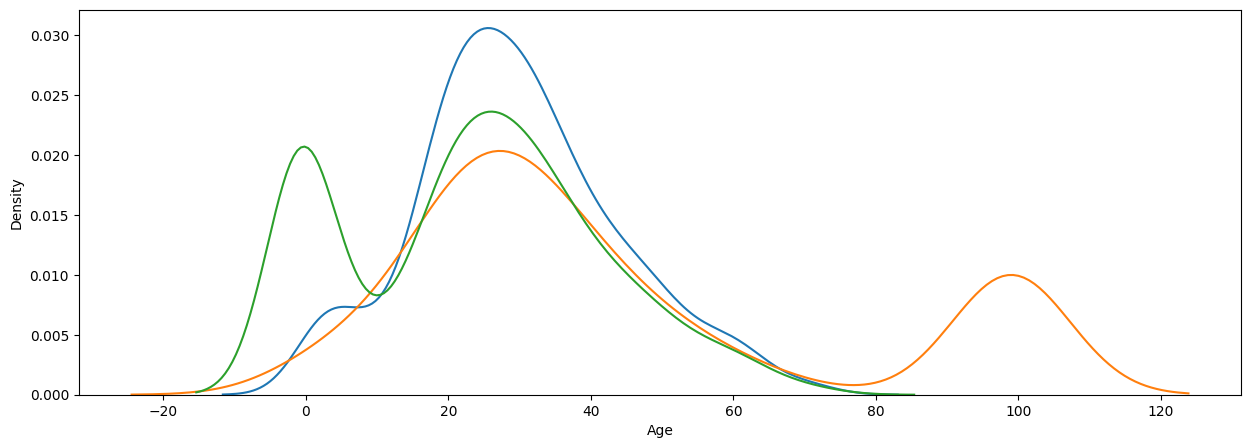

In [439]:
# Now repeating the same plotting steps 

plt.figure(figsize=(15,5))
sns.kdeplot(data=X_train['Age'])
sns.kdeplot(data=X_train['Age_filled_with_99'])
sns.kdeplot(data=X_train['Age_filled_with_-1'])
plt.plot()

[]

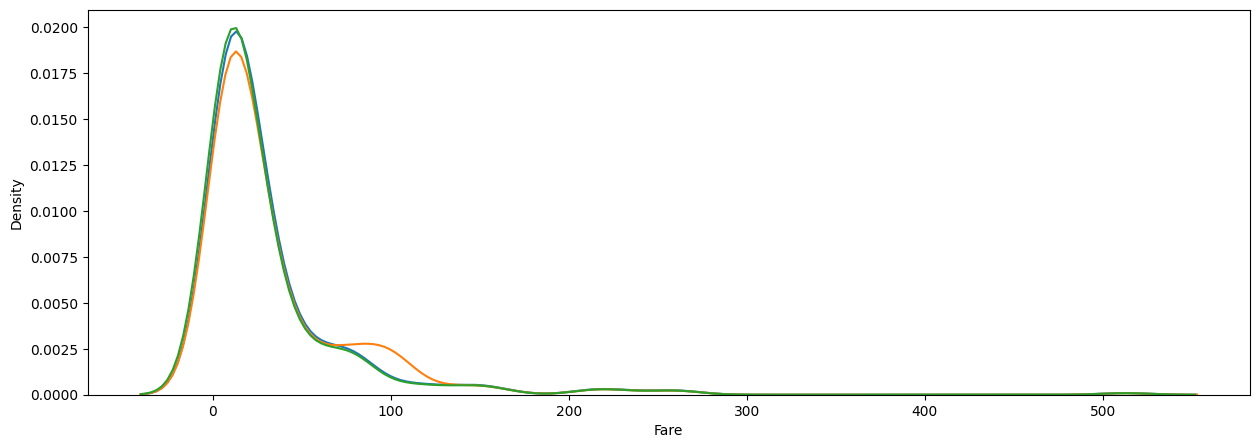

In [440]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=X_train['Fare'])
sns.kdeplot(data=X_train['Fare_filled_with_99'])
sns.kdeplot(data=X_train['Fare_filled_with_-1'])
plt.plot()

<Axes: >

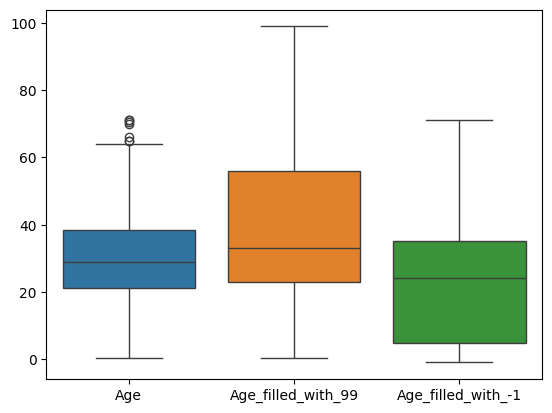

In [441]:
sns.boxplot(data=X_train[['Age','Age_filled_with_99','Age_filled_with_-1']])

<Axes: >

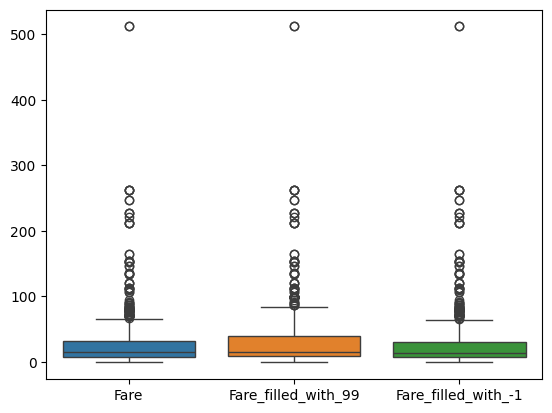

In [442]:
sns.boxplot(data=X_train[['Fare','Fare_filled_with_99','Fare_filled_with_-1']])

In [443]:
# The Selection process is same as the the other Imputing methods
# Also this can also be done using Trasnformer
#   There We will use the Simple Imputer but the strategy will be 'Constant' and fill_value = required value

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

trf2 = ColumnTransformer(
        transformers= [
            ( 'imputer_99' , SimpleImputer(strategy='constant',fill_value=99) , ['Age','Fare'] ) ,
            ( 'imputer_-1' , SimpleImputer(strategy='constant',fill_value=-1) , ['Age','Fare'] )
        ] ,
        remainder='passthrough'
)

trf2.fit(X_train)

X_train = trf2.transform(X_train)
X_test = trf2.transform(X_test)

X_train,X_test


(array([[ 40.    ,  27.7208,  40.    ,  27.7208,   0.    ],
        [  4.    ,  16.7   ,   4.    ,  16.7   ,   2.    ],
        [ 47.    ,   9.    ,  47.    ,   9.    ,   0.    ],
        ...,
        [ 71.    ,  49.5042,  71.    ,  49.5042,   0.    ],
        [ 99.    , 221.7792,  -1.    , 221.7792,   0.    ],
        [ 99.    ,  25.925 ,  -1.    ,  25.925 ,   0.    ]], shape=(712, 5)),
 array([[ 42.    ,  26.2875,  42.    ,  26.2875,   0.    ],
        [ 21.    ,   8.05  ,  21.    ,   8.05  ,   0.    ],
        [ 24.    ,  65.    ,  24.    ,  65.    ,   3.    ],
        [ 28.    ,  56.4958,  28.    ,  56.4958,   0.    ],
        [ 17.    ,   7.925 ,  17.    ,   7.925 ,   6.    ],
        [ 30.    ,   7.8958,  30.    ,   7.8958,   0.    ],
        [ 80.    ,  30.    ,  80.    ,  30.    ,   0.    ],
        [ 25.    ,   7.25  ,  25.    ,   7.25  ,   0.    ],
        [ 50.    , 133.65  ,  50.    , 133.65  ,   2.    ],
        [ 25.    ,  26.    ,  25.    ,  26.    ,   1.    ],
        [

In [444]:
# Note for the all the methods down I haven't done the train test split which is wromg . 
# The good practice is to first split then do the transformations on train and test subset of X , to avoid data leak.

In [445]:
# Now we will use the frequency of the value / mode for Imputing.
# This is mostly done on categorical data

df= pd.read_csv('Titanic-Dataset.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [446]:
# Here we will Apply it to the Embarked Column here as it is most suitable for it ( It could have also bean applied to the Age column) . 
df['Embarked_imputed_freq'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [447]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_imputed_freq
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


[]

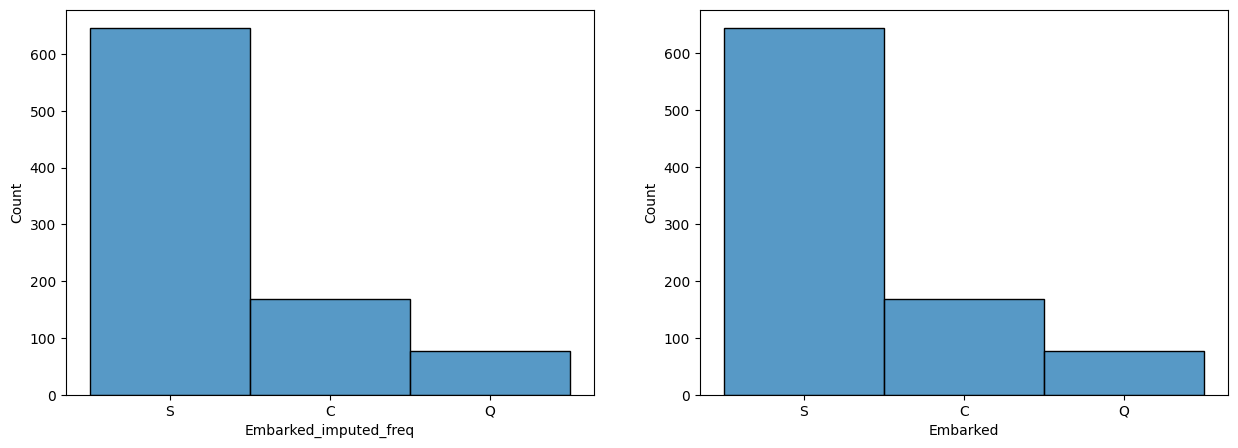

In [448]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data = df['Embarked_imputed_freq'])
plt.subplot(122)
sns.histplot(data = df['Embarked'])
plt.plot()

[]

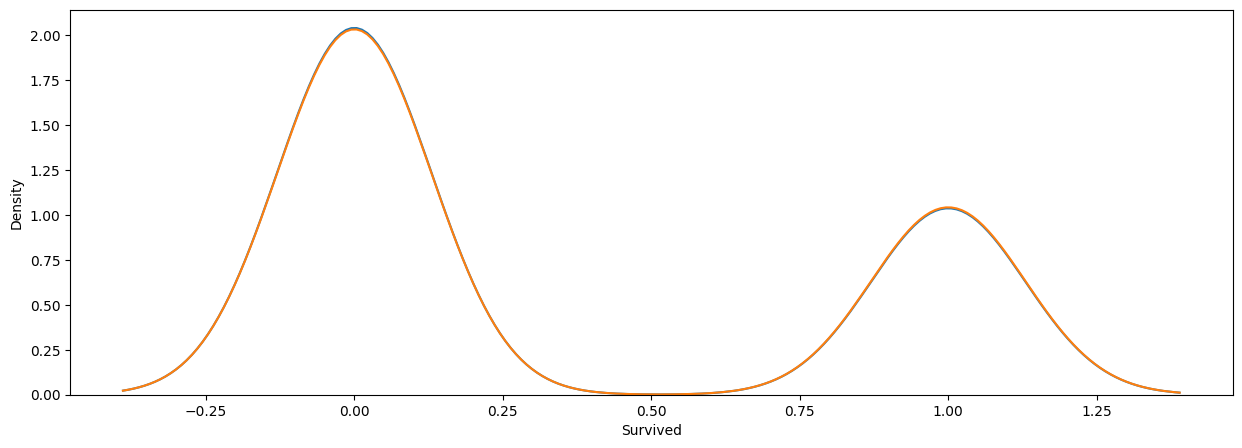

In [449]:
plt.figure(figsize=(15,5))
sns.kdeplot(df[df['Embarked'] == 'S']['Survived'],label='Original curve')
sns.kdeplot(df[df['Embarked_imputed_freq'] == 'S']['Survived'],label='Imputed Curve')
plt.plot()

In [450]:
# Similarly we can apply other stastical methods and Use the Simple Imputer for strategy='mode'

In [451]:
# Now for the 'Cabin'  column above we could have another thing which is we could have added a new Missing column instead thorugh which we will know that the value were missing for this.
# Now lets try Imputing using pandas and Simple Imputer 

df= pd.read_csv('Titanic-Dataset.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [452]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [453]:
df['Cabin'].value_counts().sort_values(ascending=True)

Cabin
D56            1
B78            1
B30            1
D10 D12        1
A5             1
              ..
C22 C26        3
D              3
G6             4
B96 B98        4
C23 C25 C27    4
Name: count, Length: 147, dtype: int64

In [454]:
df['Cabin_new'] = df['Cabin'].fillna('Missing')

In [455]:
df['Cabin_new']

0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin_new, Length: 891, dtype: object

In [456]:
# The same can be done using SimpleImputer ; strategy='constant' and fill_value = 'Missing'

In [457]:
# See In real life Analysis of Titanic Dataset Here we should have made an addition column (Binary) which would showcase whether the columns in the 'Cabin; were mssing or not.

In [458]:
# Now we can use the Missing Indicator to do this for us which will create a new binary column
from sklearn.impute import MissingIndicator
# We will use the SimpleImputer to make new column

In [459]:
# We can do this normally fit and transform method ; but we will do this on Column Transformer here
trf3 = ColumnTransformer(
    transformers = [
            ( 'cabin_Missing_indicator' , SimpleImputer(strategy='constant',add_indicator=True,fill_value='Missing') , ['Cabin'] )
    ],
    remainder='passthrough'
)

In [ ]:
# This is done to get the output in Pandas other than Numpy which is the default return value
trf3.set_output(transform='pandas')

,transformers,"[('cabin_Missing_indicator', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,'Missing'


In [ ]:
df_new = trf3.fit_transform(df)

In [467]:
# As we can see the output column is given by sci-kit learn itself to avoid  confusion , and now we can do this to avoid confusion.
df_new.sample(2)

,cabin_Missing_indicator__Cabin,cabin_Missing_indicator__missingindicator_Cabin,remainder__PassengerId,remainder__Survived,remainder__Pclass,remainder__Name,remainder__Sex,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Ticket,remainder__Fare,remainder__Embarked,remainder__Cabin_new
229,Missing,True,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,S,Missing
640,Missing,True,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Missing


In [468]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   cabin_Missing_indicator__Cabin                   891 non-null    object 
 1   cabin_Missing_indicator__missingindicator_Cabin  891 non-null    object 
 2   remainder__PassengerId                           891 non-null    int64  
 3   remainder__Survived                              891 non-null    int64  
 4   remainder__Pclass                                891 non-null    int64  
 5   remainder__Name                                  891 non-null    object 
 6   remainder__Sex                                   891 non-null    object 
 7   remainder__Age                                   714 non-null    float64
 8   remainder__SibSp                                 891 non-null    int64  
 9   remainder__Parch                

In [ ]:
# Now there is another Imputing method where we can use random non-null values to be Imputed in null places .
# We are gonna do this with simple pandas method
# For this lets again use the cabin column

In [ ]:
'''
                                        # Alternate method with feature-engine library 


from feature_engine.imputation import RandomSampleImputer

rsi = RandomSampleImputer(variables=[ 'Cabin'], random_state=42)
rsi.fit(df)
df_imputed = rsi.transform(df)

'''


In [507]:
# Using pandas 

# Making new column to analyze changes 
df['Cabin_random'] = df['Cabin']

# first we wil extract the Null indexes of the Cabin column
null_indices = df[df['Cabin_random'].isnull()].index
null_indices

Index([], dtype='int64')

In [508]:
# Now we pick the number of same sample (random values) to pick from non null values from the column
random_cabin_values = df['Cabin_random'].dropna().sample(len(null_indices),random_state=42,replace=True).values
random_cabin_values

array([], dtype=object)

In [509]:
# Now filling the values
df.loc[null_indices,'Cabin_random'] = random_cabin_values

In [510]:
df.Cabin_random.isnull().sum()

np.int64(0)

In [531]:
# Now we will move on with KNN Imputer which uses the KNN algorithm to impute missing values
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)

In [553]:
df = pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Pclass','Fare','Survived'])
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [554]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [555]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [556]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size=0.2 , random_state=42)

# Scalling is a must for Data columns like this and for Logistic Regression
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [557]:
# Now transforming the values using knn
# Note we use knn as whole to fit transform on X_train so that KNN can be applied using Neighboring columns data whose age columns is not NaN. 

X_train_imputed = knn.fit_transform(X_train_scalled)
X_test_imputed = knn.transform(X_test_scalled)

In [558]:
# Now applying Logistic regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr1 = LogisticRegression()

In [559]:
logr.fit(X_train_imputed,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [560]:
y_pred = logr.predict(X_test_imputed)

In [561]:
y_test 

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [562]:
accuracy = logr.score(X_test_imputed,y_test)
accuracy

0.7486033519553073

In [564]:
# Using simple Imputer 
s1 = SimpleImputer(strategy='mean')

In [565]:
X_train_simple = s1.fit_transform(X_train)
X_test_simple = s1.transform(X_test)

In [566]:
logr1.fit(X_train_simple,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [567]:
logr1.predict(X_test_simple)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0])

In [568]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [569]:
accuracy = logr1.score(X_test_simple,y_test)
accuracy

0.7374301675977654

In [571]:
# Now lets compare using pipeline for simple and knn

from sklearn.pipeline import Pipeline


In [ ]:
# Pipeline for Simple Imputation method
pipe_simple = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler()),
    ('model', LogisticRegression())
])

# Pipeline for KNN Imputation method
pipe_knn = Pipeline([
    ('impute', KNNImputer(n_neighbors=5)),
    ('scale', StandardScaler()),
    ('model', LogisticRegression())
])

# Comparing mean scores
score_simple = cross_val_score(pipe_simple, X, y, cv=5).mean()
score_knn = cross_val_score(pipe_knn, X, y, cv=5).mean()

print(f"Simple Mean Score: {score_simple:.4f}")
print(f"KNN Mean Score: {score_knn:.4f}")


Simple Mean Score: 0.7038
KNN Mean Score: 0.6948


In [574]:
# In this case the KNN performed poorly and we will be using Simple Imputer with mean if we had to choose one
# MICE is a better method for choosing from strategies 